In [2]:
cd ..

/Users/janperina/projects/masters-thesis


In [3]:
from traced_v2.models.bernoulli import BernoulliModel

In [9]:
import numpy as np 
from datetime import datetime
import time

In [25]:
probability = 0.78

In [30]:
simulated_data = np.random.choice([0, 1], size=200, p=[1-probability, probability])

In [71]:
ping_model = BernoulliModel("source", "destination", scorer= lambda x,y: False)

In [72]:
for i,x in enumerate(simulated_data):
    timestamp = int(datetime.now().timestamp()*1000)
    # time.sleep(1)
    ping_model.log(i, bool(x) )

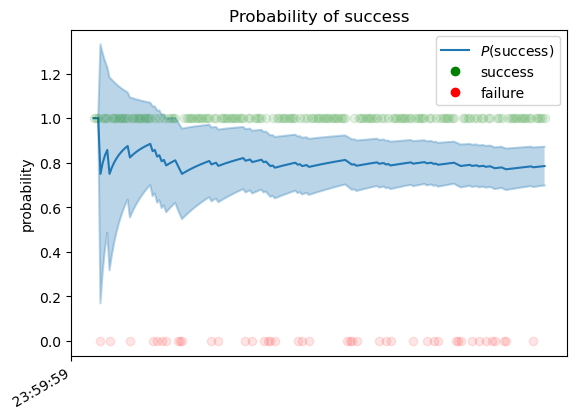

In [73]:
ping_model.plot()

In [74]:
df = ping_model.to_frame()

In [82]:
df['n'] = range(len(df))

In [83]:
df['# of hits'] = df['observed_variables'].cumsum()

In [141]:
sliced = df.iloc[5:200:20, ]

In [143]:
sliced.shape

(10, 6)

In [126]:
import matplotlib.pyplot as plt
import scipy.stats as stats

5
23
36
54
68
85
101
117
131
144


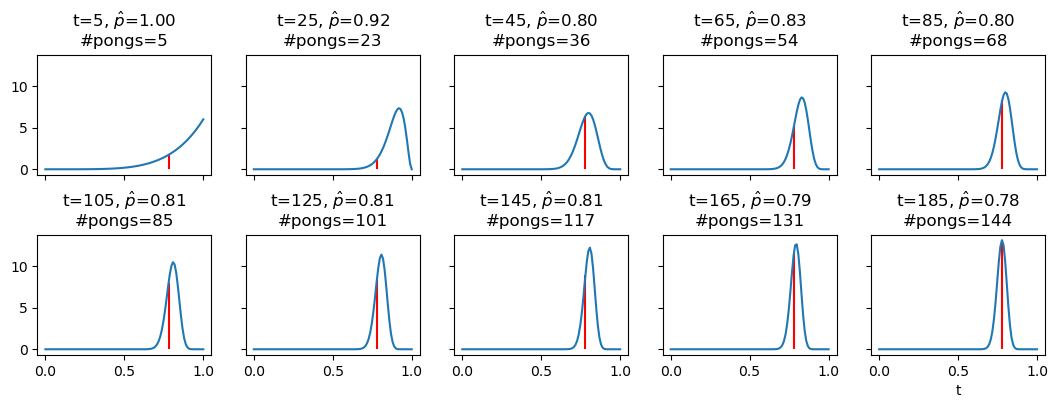

In [195]:
fig, ax = plt.subplots(2, 5, figsize=(13, 5), sharex=True, sharey=True) 
plt.subplots_adjust(bottom=0.4, top=1, hspace=.5)

axes = (x for x in ax.flatten())
ts = (5+i*20 for i in range(10))
for i, row in sliced.iterrows():
    ax = next(axes)
    # print(row['n'], row['# of hits'])
    # plot beta distribution on axes
    x = np.linspace(0, 1, 100)
    a = row['# of hits'] + 1
    b = row['n'] - row['# of hits'] + 1
    y = stats.beta.pdf(x, a, b)
    t = next(ts)
    print(row['# of hits'])
    expected = (a - 1) / (a + b - 2)    
    ax.set_title(f"t={t}, ""$\hat{p}$"f"={expected:.2f}" f"\n#pongs={row['# of hits']}")
    ax.vlines(probability, 0, stats.beta.pdf(probability, a, b), color='red')
    ax.plot(x, y)
    # ax.plot([row['n'], row['n']], [0, row['# of hits']], color='blue')
fig.savefig("results/figures/p_learning.png", dpi=300, bbox_inches='tight')

In [177]:
x = np.linspace(-5, 5, 100)
normal = stats.norm.pdf(x, 0, 1)

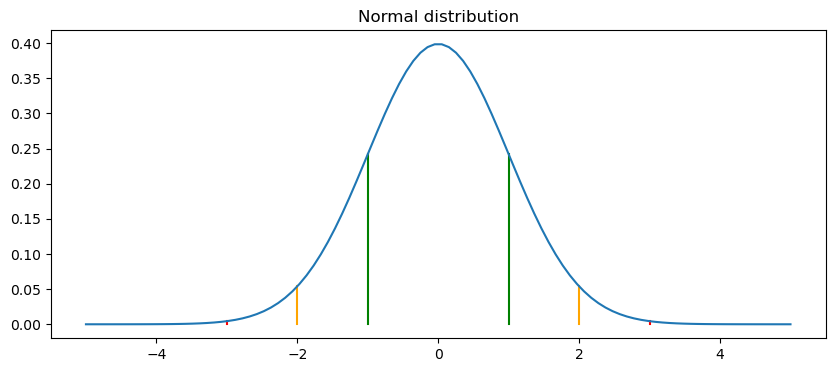

In [186]:
fig = plt.figure(figsize=(10,4))
plt.title("Normal distribution")

for c, sigma in zip(['g', 'orange', 'r'], [1, 2, 3]):
    plt.plot([-sigma, -sigma], [0, stats.norm.pdf(-sigma, 0, 1)], color=c)

    plt.plot([sigma, sigma], [0, stats.norm.pdf(sigma, 0, 1)], color=c)

plt.plot(x, normal)
